In [38]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

from statsmodels.distributions.empirical_distribution import ECDF
from scipy.stats import expon

# Генерация выборки экспоненциального распределения с заданными параметрами
scale, N = 1, 10000
sample = np.random.exponential(scale, N)

num_bins = 100

hist, bin_edges = np.histogram(sample, bins=num_bins, density=True) # bin_edges
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2 # в каждом интервале берем среднее?
pdf_values = stats.expon.pdf(bin_centers, loc = 0, scale = 1) # функция плотности


"""
При density=True в hist хранятся значения плотности вероятности (в каждом интервале)
При density=False в hist хранятся абсолютные частоты  (в каждом интервале)
Так как для расчета хи квадрат нужны абсолютные частоты мы домножаем на
(bin_edges[1] - bin_edges[0]) - ширину интервала
(нормализация гистограммы)

"""

'''
Метод хи-квадрат (χ²) заключается в проверке гипотезы о соответствии наблюдаемого 
распределения теоретическому распределению. В вашем случае вы проверяете, 
соответствует ли выборка, сгенерированная из экспоненциального распределения,
теоретическому экспоненциальному распределению.
'''

### 237 страница

### Рассчет наблюдаемых и ожидаемых частот:

# ожидаемые частоты для каждого интервала
expected_frequencies = pdf_values * (bin_edges[1] - bin_edges[0]) * N
#expected_frequencies = pdf_values * N

# наблюдаемые частоты для каждого интервала
observed_frequencies = hist * (bin_edges[1] - bin_edges[0]) * N
#observed_frequencies = hist  * N

# Расчет статистики Хи-квадрат
chi_square_statistic = ((observed_frequencies - expected_frequencies) ** 2 / expected_frequencies).sum()

# 1.3 Определение критических значений хи квадрта для уровней значимости 0.1, 0.05, 0.01
alpha_levels = [0.1, 0.05, 0.01]
critical_values = [stats.chi2.ppf(1 - alpha, df=num_bins-1-1) for alpha in alpha_levels]

## Отвергаем гипотезу? всегда разные значения
print(chi_square_statistic, critical_values, '\n')

### Гипотезы не отвергаем во всех случаях, так как χ²набл. < χ²крит.

104.13590108749327 [116.31529838274676, 122.10773460981942, 133.47567232298493] 



0.00710658188403529 {0.1: 0.012238478702170826, 0.05: 0.013580986393225504, 0.01: 0.016276236115189503} 



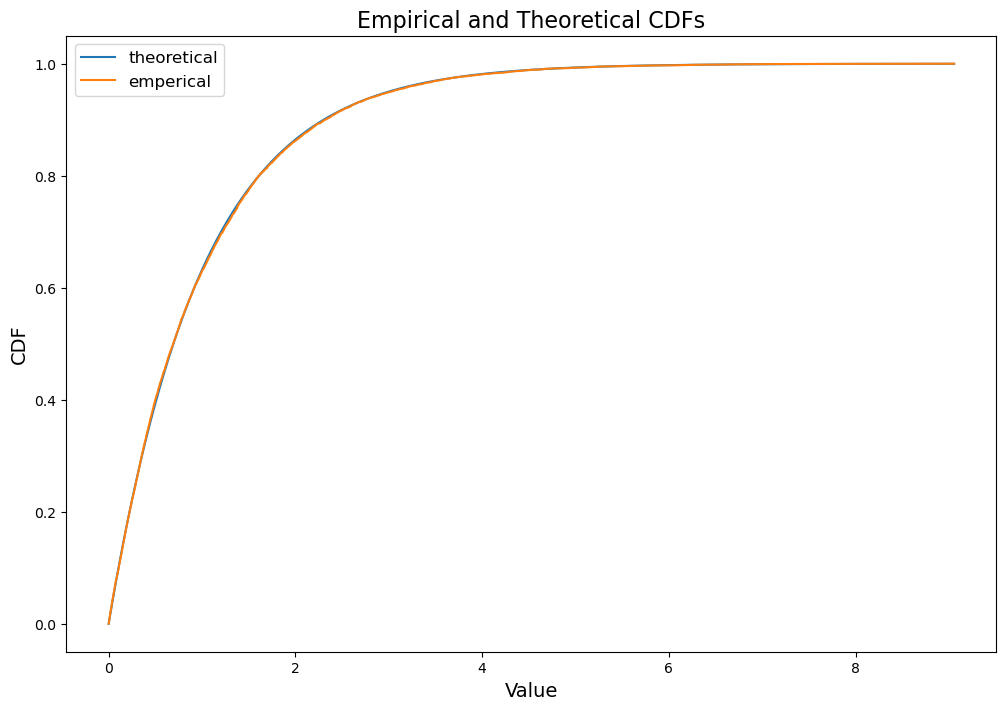

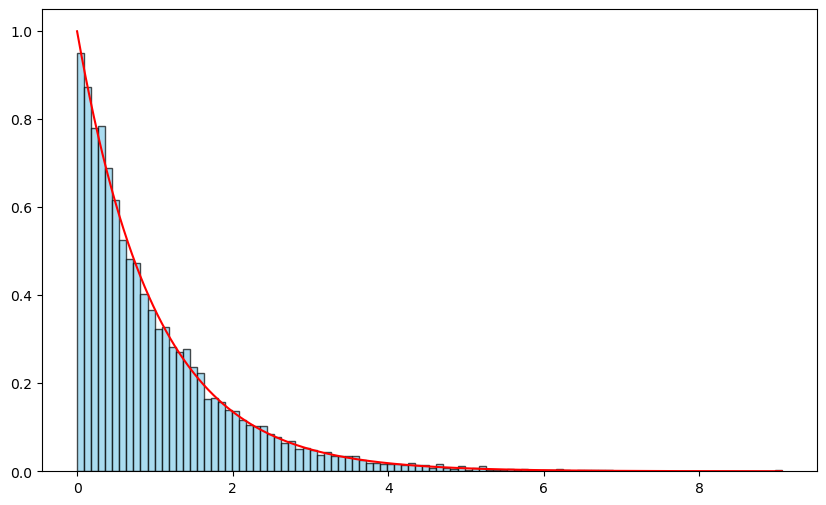

In [41]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

from statsmodels.distributions.empirical_distribution import ECDF
from scipy.stats import expon

"""
empirical_cdf_values представляет собой массив, 
где каждый элемент отражает эмпирическую вероятность того, что 
случайная величина не превысит соответствующего значения из отсортированной
выборки. Это позволяет нам оценить, как распределены данные в выборке 
относительно вероятности их значения в рамках всего набора данных.
"""

'''
Критерий Колмогорова-Смирнова используется для проверки гипотезы о соответствии
эмпирического распределения данных заданному теоретическому распределению. 
'''

### 242 страница

sorted_sample = np.sort(sample)
theoretical_cdf_values = stats.expon.cdf(sorted_sample, loc = 0, scale = 1) # гипотетическая функция распределения генеральной совокупности
empirical_cdf_values = np.arange(1, N + 1) / N # эмпирическая функция распределения, построенная по выборке Х


'''
вычисляет статистику Колмогорова, которая равна максимальному абсолютному
отклонению между эмпирической и теоретической функциями распределения.
'''
kolmogorov_statistic = np.max(np.abs(empirical_cdf_values - theoretical_cdf_values))

# Для критерия Колмогорова критические значения зависят от размера выборки и уровня значимости
# Используем приближенную формулу для больших выборок
kolmogorov_critical_values = {alpha: stats.kstwobign.ppf(1 - alpha) / np.sqrt(N) for alpha in alpha_levels} # находим критические значения

'''
Ваше значение статистики Колмогорова-Смирнова (0.01134266932204625) меньше всех критических значений для уровней
значимости 0.1, 0.05 и 0.01. P-значение (0.15137606298853223) также значительно больше всех уровней значимости.

Вывод: У вас нет оснований отвергнуть нулевую гипотезу о том, что ваша выборка следует экспоненциальному
распределению. Это означает, что ваша выборка хорошо соответствует теоретическому экспоненциальному распределению
на всех проверенных уровнях значимости.
'''

loc = 0
print(kolmogorov_statistic, kolmogorov_critical_values, '\n')
#print(stats.kstest(sample, 'expon', args=(loc, scale)))


plt.figure(figsize=(12, 8))
#  теоретическая
cdf = expon.cdf(sorted_sample, loc, scale)
plt.plot(sorted_sample, cdf, label="theoretical")
# эмпирическая
#ecdf = ECDF(sample)
#plt.plot(ecdf.x, ecdf.y, label= "emperical")
plt.plot(sorted_sample, empirical_cdf_values, label= "emperical")


plt.xlabel('Value', fontsize=14)  
plt.ylabel('CDF', fontsize=14)  
plt.title('Empirical and Theoretical CDFs', fontsize=16)  
plt.legend(fontsize=12, loc='upper left')  


plt.figure(figsize=(10, 6))
# Построение гистограммы
plt.hist(sample, bins=num_bins, density=True, color='skyblue', edgecolor='black', alpha=0.7, label='Гистограмма')

# Теоритическая плотность вероятности с истинными параметрами
# График теоретической плотности вероятности (PDF) экспоненциального распределения с параметрами loc=0 и scale=1.
x = np.linspace(min(sample), max(sample), 1000)
pdf_true = expon.pdf(x, loc = 0, scale = 1)
plt.plot(x, pdf_true, label='Теоретическая', color='r')
plt.show()


In [21]:
# Генерация выборок X и Y из логистического распределения с заданными параметрами
scale = 1
X = np.random.exponential(scale, N)
Y = np.random.exponential(scale, N)

'''
Коэффициент корреляции - это мера, используемая для оценки силы и направления линейной связи между двумя случайными величинами. 
'''

## Страница 37
# Расчет коэффициента корреляции между X и Y
# Вычисление матрицы коэффициентов корреляции для двух массивов
# [0][1]: Извлечение коэффициента корреляции между X и Y из матрицы корреляции. Это значение находится в первой строке и втором столбце матрицы.
correlation_coefficient = np.corrcoef(X, Y)[0][1]

'''
Т-статистика также может дать представление о силе связи между переменными.
Чем больше абсолютное значение T-статистики, тем сильнее корреляция между переменными
'''

# Расчет значения статистики T
T_statistic = correlation_coefficient * np.sqrt((N - 2) / (1 - correlation_coefficient ** 2))

# Определение критических значений для уровней значимости 0.1, 0.05, 0.01
alpha_levels = [0.1, 0.05, 0.01]
critical_values = {alpha: stats.t.ppf(1 - alpha/2, df=N-2) for alpha in alpha_levels}

print(correlation_coefficient, ' ', T_statistic, ' ', critical_values)

'''
Коэффициент корреляции r: 0.014285664334223614

Этот коэффициент показывает, что между переменными X и Y имеется очень слабая положительная корреляция.
Значение близко к нулю, что указывает на то, что нет явной линейной зависимости между переменными.

нет оснований для отвержения нулевой гипотезы о том, что коэффициент корреляции между переменными X и Y равен нулю.
так как значение T статистики меньше всех критических значений Т статистики при разных уровнях значимости
'''

0.014285664334223614   1.4285693484365727   {0.1: 1.6450060485564049, 0.05: 1.9602012873568364, 0.01: 2.5763211450545076}


In [28]:
# Результаты для различных значений σ (среднеквадратическим отклонением)
sigma_values = [0.001, 100, 1000]
results = {}

for sigma in sigma_values:
    b = np.random.normal(0, sigma, N)
    Y_modified = 2 * X + b
    correlation_coefficient_modified = np.corrcoef(X, Y_modified)[0, 1]
    T_statistic_modified = correlation_coefficient_modified * np.sqrt((N - 2) / (1 - correlation_coefficient_modified ** 2))
    results[sigma] = (correlation_coefficient_modified, T_statistic_modified)

print(results)


#Для σ=0.001:
#
#Коэффициент корреляции: примерно 1.
#T-статистика: очень высокая, примерно 199055.
#Это говорит о том, что есть почти полная линейная зависимость между переменными X и Y_modified при 
#σ=0.001, и это отражается в очень высоком значении T-статистики.
#
#
#Для σ=100:
#
#Коэффициент корреляции: около 0.03.
#T-статистика: около 2.67.
#Значения указывают на то, что при увеличении σ до 100 корреляция между переменными становится 
#незначительной, что подтверждается более низким значением коэффициента корреляции и T-статистики.
#
#Для σ=1000:
#
#Коэффициент корреляции: около -0.004.
#T-статистика: около -0.421.
#Значения указывают на то, что при еще большем увеличении σ корреляция между переменными становится
#еще менее значимой и может быть даже отрицательной, что подтверждается близким к нулю значением
#коэффициента корреляции и отрицательной T-статистикой.
#
#
#Выводы:
#Уменьшение среднеквадратического отклонения  σ приводит к более 
#сильной корреляции между переменными.
#
#Увеличение σ делает корреляцию между переменными менее значимой 
#и в конечном итоге может привести к отсутствию корреляционной
#зависимости или даже к обратной зависимости.


{0.001: (0.999999875456865, 200346.4405699017), 100: (0.028048086008511577, 2.805631911576903), 1000: (-6.393235124492075e-05, -0.0063925957820746265)}
